In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import config
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#import id and secret from config file
cid = config.id
secret = config.secret

#setup the client credentials
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(auth_manager = client_credentials_manager)

#grab the uri of the global top 50 songs and extract the track 
play_link = 'https://open.spotify.com/playlist/37i9dQZEVXbLp5XoPON0wI'
play_uri = play_link.split('/')[-1]
track_uri = [x['track']['uri'] for x in sp.playlist_tracks(play_uri)['items']]

#loop through the uri descriptions to grab key descriptors of each song
a = {}
for i in range(len(sp.playlist_tracks(play_uri)['items'])):
    lst = {}
    song_name = sp.playlist_tracks(play_uri)['items'][i]['track']['name']
    singer_name = sp.playlist_tracks(play_uri)['items'][i]['track']['artists'][0]['name']
    song_popularity = sp.playlist_tracks(play_uri)['items'][i]['track']['popularity']
    lst['Singer Name'] = singer_name
    lst['Popularity'] = song_popularity
    for attr, val in sp.audio_features(track_uri)[i].items():
        if attr not in ('id','uri','track_href','analysis_url','time_signature'):
            lst[attr] = val
    a[song_name] = lst


#create data frame and switch axes for analysis
df = pd.DataFrame.from_dict(a)
df = df.swapaxes('index','columns')




In [2]:
#drop the type variable as it is not needed for analysis
df = df.drop('type',axis=1)

In [3]:
#convert all column data types to float
for i in range(1,len(list(df.columns))):
    df[df.columns[i]] = df[df.columns[i]].astype(float)

In [4]:
# grab the top ten songs and the bottom 40 songs
top_ten = df[0:10]
next_forty = df[10:]

In [5]:
#put the labels in a list as well as the averages for each of the attributes for the top ten and the bottom 40
labels = df.columns[1:]
top_ten_avg = []
next_forty_avg = []
for i in labels:
    top_ten_avg.append(top_ten[i].mean())
    next_forty_avg.append(next_forty[i].mean())

In [6]:
#pull in matplotlib
import matplotlib.pyplot as plt

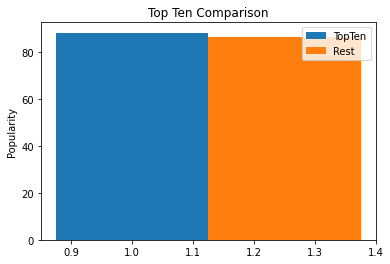

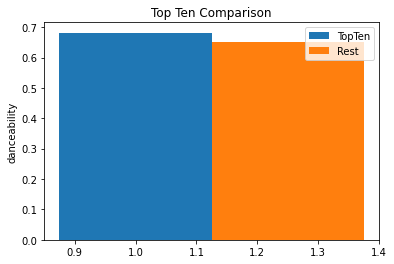

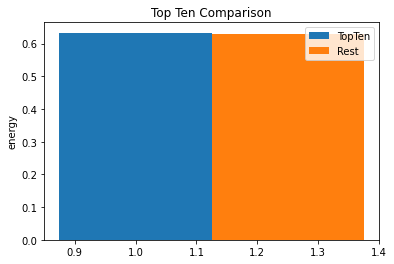

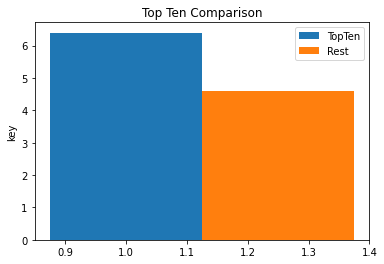

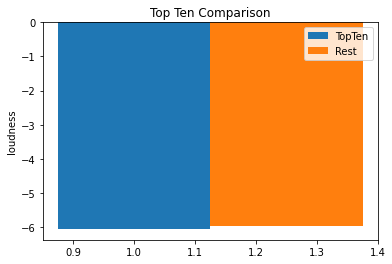

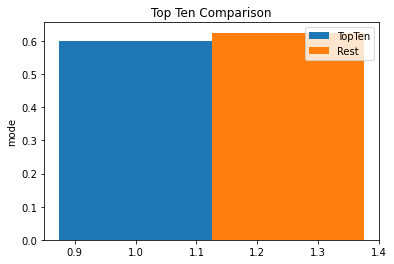

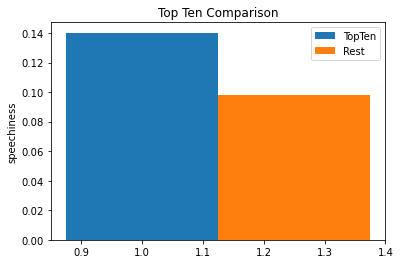

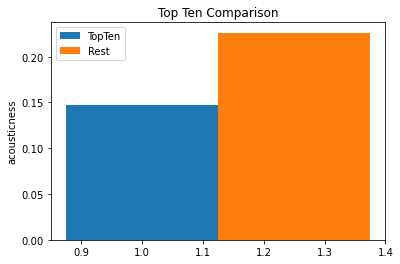

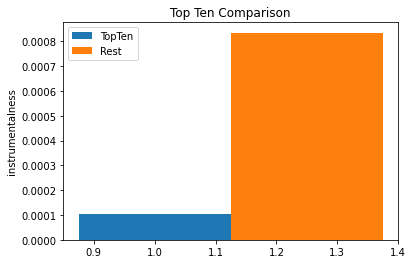

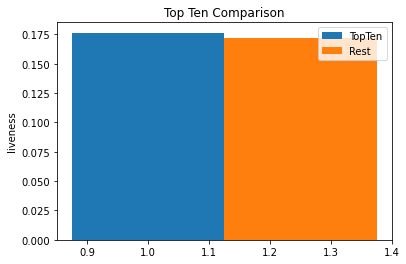

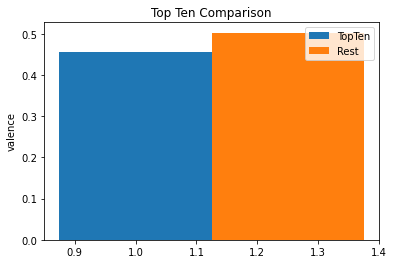

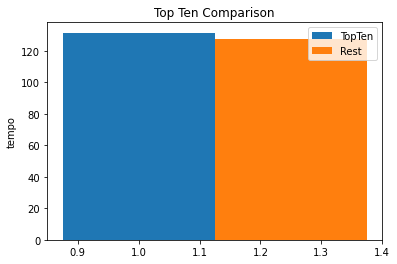

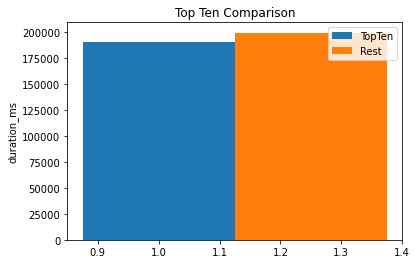

In [7]:
#loop through all the attributes and create a bar graph to compare the two
for i in range(len(labels)):
    x = 1
    width = .25

    plt.bar(x,top_ten_avg[i],width,label='TopTen')
    plt.bar(x+width,next_forty_avg[i],width,label='Rest')

    plt.ylabel(labels[i])
    plt.title('Top Ten Comparison')
    plt.legend(loc='best')
    plt.show()
